In [1]:
import torch

save_name = "qwen-14b"

save_name_to_idx_map = {
    "qwen-1.5b": 0,
    "qwen-7b": 1,
    "qwen-14b": 2,
}

name_to_model_map = {
    "qwen-1.5b": ["Qwen/Qwen2.5-Math-1.5B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"],
    "qwen-7b": ["Qwen/Qwen2.5-Math-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"],
    "qwen-14b": ["Qwen/Qwen2.5-14B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"],
}

for save_name in ["qwen-1.5b", "qwen-7b", "qwen-14b"]:
    weight_path = f"../checkpoints/version_{save_name_to_idx_map[save_name]}/{save_name}_13.pt"
    weights = torch.load(weight_path, map_location="cpu")
    print(weights.keys())

    base_dec = weights["W_dec"][:, 0, :]
    reasoning_dec = weights["W_dec"][:, 1, :]
    print(base_dec.shape, reasoning_dec.shape)
    base_norms = torch.norm(base_dec, p=1, dim=1)
    reasoning_norms = torch.norm(reasoning_dec, p=1, dim=1)

    relative_norms = reasoning_norms.float() / base_norms.float()
    normalized_relative_norms = relative_norms / (1 + relative_norms)
    print(normalized_relative_norms.mean())
    torch.cuda.empty_cache()

/tmp/ipykernel_2437222/1262027548.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weight_path, map_location="cpu")


odict_keys(['W_enc', 'W_dec', 'b_enc', 'b_dec'])
torch.Size([32768, 1536]) torch.Size([32768, 1536])
tensor(0.5042)
odict_keys(['W_enc', 'W_dec', 'b_enc', 'b_dec'])
torch.Size([32768, 3584]) torch.Size([32768, 3584])
tensor(0.4924)
odict_keys(['W_enc', 'W_dec', 'b_enc', 'b_dec'])
torch.Size([32768, 5120]) torch.Size([32768, 5120])
tensor(0.5400)


/tmp/ipykernel_2437222/2215947813.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weight_path, map_location="cpu")


odict_keys(['W_enc', 'W_dec', 'b_enc', 'b_dec'])
torch.Size([32768, 5120]) torch.Size([32768, 5120])
tensor(0.5400) tensor(0.0346)


/tmp/ipykernel_2437222/2215947813.py:32: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 30000)


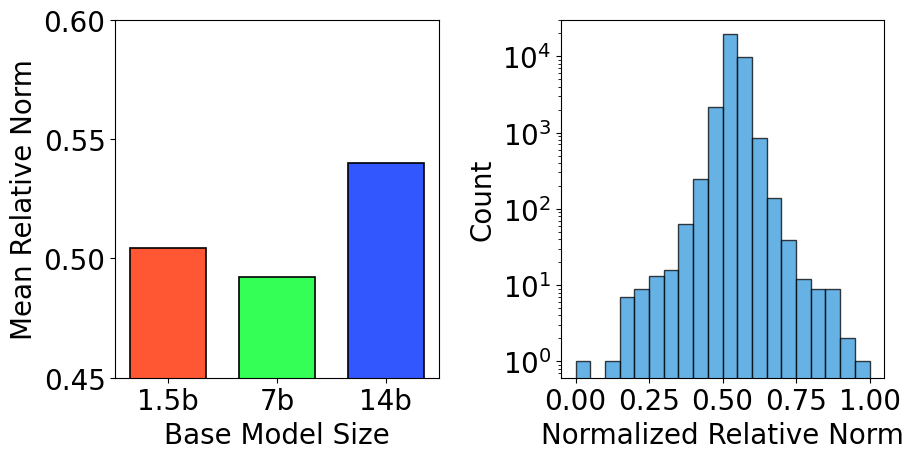

In [34]:
save_name = "qwen-14b"

weight_path = f"../checkpoints/version_{save_name_to_idx_map[save_name]}/{save_name}_13.pt"
weights = torch.load(weight_path, map_location="cpu")
print(weights.keys())

base_dec = weights["W_dec"][:, 0, :]
reasoning_dec = weights["W_dec"][:, 1, :]
print(base_dec.shape, reasoning_dec.shape)
base_norms = torch.norm(base_dec, p=1, dim=1)
reasoning_norms = torch.norm(reasoning_dec, p=1, dim=1)

relative_norms = reasoning_norms.float() / base_norms.float()
normalized_relative_norms = relative_norms / (1 + relative_norms)

data_list = [0.5042, 0.4924, 0.5400]
labels = ["1.5b", "7b", "14b"]

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 20
plt.figure(figsize=(9.5, 5))

plt.subplot(1, 2, 2)
plt.hist(normalized_relative_norms.numpy(), bins=20, color='#3498db', edgecolor='black', alpha=0.75)
print(normalized_relative_norms.mean(), normalized_relative_norms.std())
plt.ylabel('Count')
plt.xlabel('Normalized Relative Norm')
plt.yticks([0,5000,10000,15000,20000])
plt.xticks([0,0.25,0.5,0.75,1])
plt.yscale('log')
plt.ylim(0, 30000)

plt.subplot(1, 2, 1)
colors = ['#FF5733', '#33FF57', '#3357FF']  # Different colors for each bar
plt.bar(labels, data_list, width=0.7,color=colors, edgecolor='black', linewidth=1.2)
plt.ylim(0.45, 0.6)  # Set the y-axis limits
plt.yticks([0.45, 0.5, 0.55, 0.6])  # Set the y-axis ticks

# Add labels and title with a more stylish font
plt.xlabel("Base Model Size")
plt.ylabel("Mean Relative Norm")

plt.tight_layout()
plt.savefig("../figures/relative_norms.pdf", bbox_inches='tight')


/tmp/ipykernel_2437222/3088567198.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weight_path, map_location="cpu")


3565 456
0.828125
3565 2
3565 3


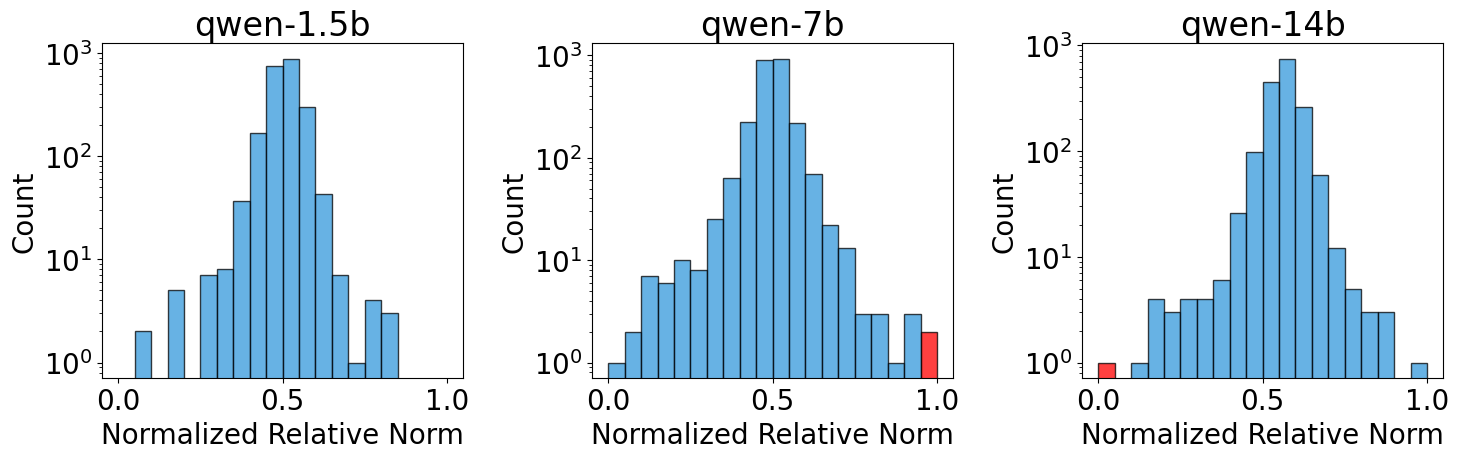

In [3]:
import torch

plt.figure(figsize=(15, 5))

save_name_to_idx_map = {
    "qwen-1.5b": 0,
    "qwen-7b": 1,
    "qwen-14b": 2,
}

name_to_model_map = {
    "qwen-1.5b": ["Qwen/Qwen2.5-Math-1.5B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"],
    "qwen-7b": ["Qwen/Qwen2.5-Math-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"],
    "qwen-14b": ["Qwen/Qwen2.5-14B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"],
}
save_name_list = ["qwen-1.5b", "qwen-7b", "qwen-14b"]
for i in range(3):
    save_name = save_name_list[i]
    weight_path = f"../checkpoints/version_{save_name_to_idx_map[save_name]}/{save_name}_13.pt"
    weights = torch.load(weight_path, map_location="cpu")

    base_dec = weights["W_dec"][:, 0, :]
    reasoning_dec = weights["W_dec"][:, 1, :]
    
    base_norms = torch.norm(base_dec, p=1, dim=1)
    reasoning_norms = torch.norm(reasoning_dec, p=1, dim=1)

    new_filename = "../results/" + weight_path[3:-3].replace("/","__") + "_wait.json"

    import json
    with open(new_filename, 'r') as f:
        data = json.load(f)
        
    new_data = []
    max_val = max(data.values())
    print(max_val, data['4975'])
    for key in data.keys():
        if data[key] > max_val * 0.1:
            rel_norm = reasoning_norms[int(key)] / base_norms[int(key)]
            normalized_relative_norms = rel_norm / (1 + rel_norm)
            new_data.append(normalized_relative_norms.item())
            if key == '4975':
                print(normalized_relative_norms.item())

    plt.subplot(1, 3, i+1)
    hist_values, bin_edges, patches = plt.hist(new_data, bins=20, range=(0,1), color='#3498db', edgecolor='black', alpha=0.75)
    extreme_bin_index = -1  # Last bin (rightmost)
    if i== 2:
        extreme_bin_index = 0
    patches[extreme_bin_index].set_facecolor('red')  # Change color to red
    plt.title(f"{save_name}")
    plt.xlabel('Normalized Relative Norm')
    plt.ylabel('Count')
    plt.yscale('log')

plt.tight_layout()
plt.savefig("../figures/wait_plot.pdf", bbox_inches='tight')
    

/tmp/ipykernel_2437222/615668174.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(weight_path, map_location="cpu")


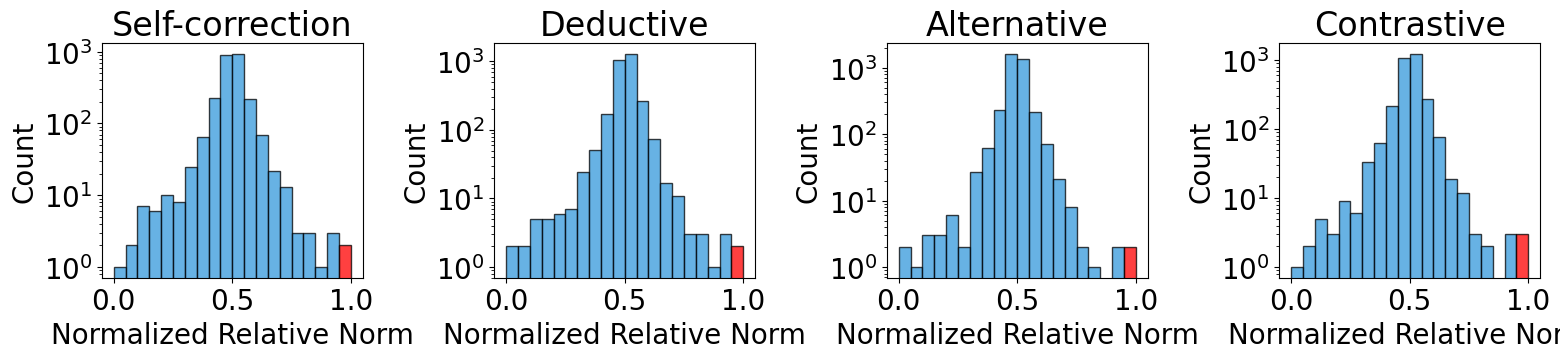

In [4]:
import torch
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

save_name_to_idx_map = {
    "qwen-1.5b": 0,
    "qwen-7b": 1,
    "qwen-14b": 2,
}

target_name_list = ["wait", "deductive", "alternative", "contrastive"]

target_token_map = {
    "wait" : [" wait", "Wait"],
    "deductive": ["Therefore", "Thus"],
    "alternative": ["Alternatively"],
    "contrastive": ["However", "But"]
}

target_name_to_label_map = {
    "wait" : "Self-correction",
    "deductive": "Deductive",
    "alternative": "Alternative",
    "contrastive": "Contrastive"
}

target_token_count_map = {
    "wait" : 3605,
    "deductive": 3605,
    "alternative": 3605,
    "contrastive": 3605
}


import numpy as np


name_to_model_map = {
    "qwen-1.5b": ["Qwen/Qwen2.5-Math-1.5B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"],
    "qwen-7b": ["Qwen/Qwen2.5-Math-7B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B"],
    "qwen-14b": ["Qwen/Qwen2.5-14B", "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B"],
}
for i in range(4):
    save_name = "qwen-7b"
    target_name = target_name_list[i]
    weight_path = f"../checkpoints/version_{save_name_to_idx_map[save_name]}/{save_name}_13.pt"
    weights = torch.load(weight_path, map_location="cpu")

    base_dec = weights["W_dec"][:, 0, :]
    reasoning_dec = weights["W_dec"][:, 1, :]
    
    base_norms = torch.norm(base_dec, p=1, dim=1)
    reasoning_norms = torch.norm(reasoning_dec, p=1, dim=1)

    new_filename = "../results/" + weight_path[3:-3].replace("/","__") + f"_{target_name}.json"

    import json
    with open(new_filename, 'r') as f:
        data = json.load(f)

    freq_values = list(val for val in data.values() if val> 0)
    frac = 0.9
    quantile_threshold = np.quantile(freq_values, 1 - frac)
        
    max_val = max(data.values())
    new_data = []
    for key in data.keys():
        if data[key] > max_val * 0.1:
            rel_norm = reasoning_norms[int(key)] / base_norms[int(key)]
            normalized_relative_norms = rel_norm / (1 + rel_norm)
            new_data.append(normalized_relative_norms.item())

    plt.subplot(1, 4, i+1)
    hist_values, bin_edges, patches = plt.hist(new_data, bins=20, range=(0,1), color='#3498db', edgecolor='black', alpha=0.75)
    extreme_bin_index = -1  # Last bin (rightmost)
    patches[extreme_bin_index].set_facecolor('red')  # Change color to red
    plt.title(f"{target_name_to_label_map[target_name]}")
    plt.xlabel('Normalized Relative Norm')
    plt.ylabel('Count')
    plt.yscale('log')

plt.tight_layout()
plt.savefig("../figures/reasoning_plot.pdf", bbox_inches='tight')
    

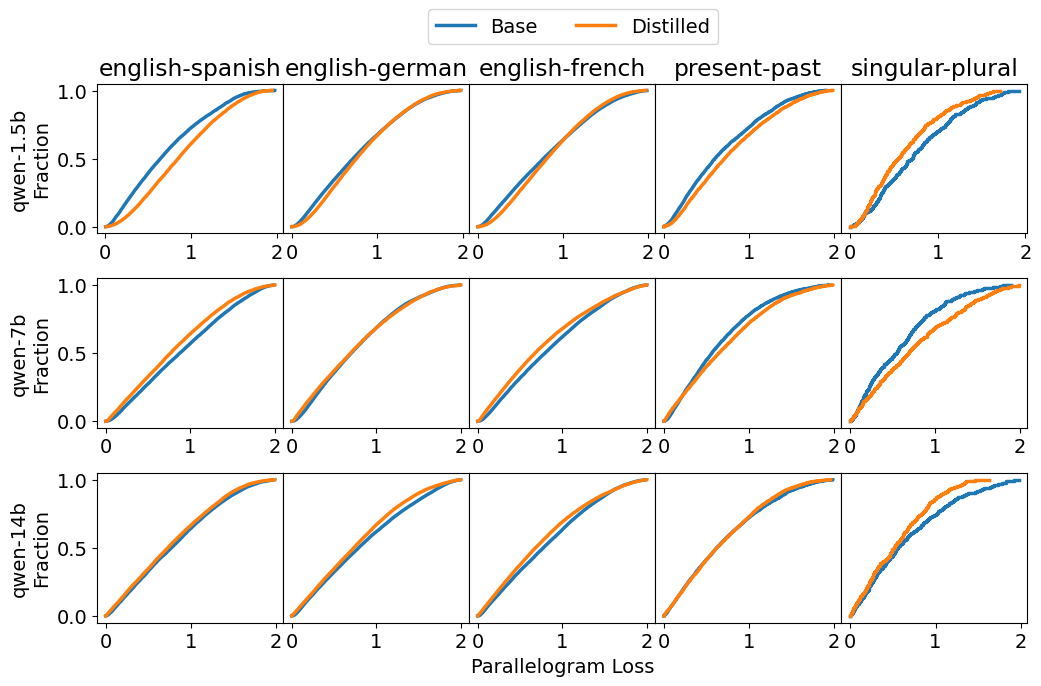

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Data lists
function_list = ["english-spanish", "english-german", "english-french", "present-past", "singular-plural"]
save_name_list = ["qwen-1.5b", "qwen-7b", "qwen-14b"]

n_comp = 2

plt.rcParams.update({'font.size': 14})

# Create figure and axes using the object-oriented API.
fig, axes = plt.subplots(3, 5, figsize=(12, 7))
plt.subplots_adjust(wspace=0.0, hspace=0.3)

for i in range(3):
    for j in range(5):
        save_name = save_name_list[i]
        func_name = function_list[j]
        filename = f"../results/{func_name}_{save_name}_{n_comp}.json"
        with open(filename, "r") as f:
            data = json.load(f)
            
        orig_norm_list = [float(x) for x in data["base"]]
        new_norm_list = [float(x) for x in data["reasoning"]]
        
        # Get the current axis.
        ax = axes[i, j]
        
        # Sort the data and compute cumulative counts.
        sorted_data = np.sort(orig_norm_list)
        sorted_chat_data = np.sort(new_norm_list)
        cumulative_counts = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        
        # Plot the two curves on this axis. Note that we add labels here...
        ax.step(sorted_data, cumulative_counts, where='post', label="Base", linewidth=2.5)
        ax.step(sorted_chat_data, cumulative_counts, where='post', label="Distilled", linewidth=2.5)
        
        # Set title and labels for clarity.
        if i == 0:
            ax.set_title(func_name)
        if i == 2 and j == 2:
            ax.set_xlabel('Parallelogram Loss')
        if j == 0:
            ax.set_ylabel(save_name + '\nFraction')
        ax.set_xticks([0,1,2])
        if j == 0:
            ax.set_yticks([0,0.5,1])
        else:
            ax.set_yticks([])

# Instead of adding a legend to each subplot, grab the handles and labels from one axis.
handles, labels = axes[0, 0].get_legend_handles_labels()

# Add a shared legend to the figure.
# You can adjust loc and bbox_to_anchor as needed.
fig.legend(handles, labels, bbox_to_anchor=(0.35,0.7,0.3,0.3), ncol=2)

# Adjust the layout to make room for the global legend.
#plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.savefig(f"../figures/parallelogram_{n_comp}.pdf", bbox_inches='tight')
plt.show()


In [9]:
save_name = "qwen-7b"
target_name = "wait"
random_ablate = False
amplify = False

import json
import numpy as np
for target_name in ["wait"]:
    for half_ablate in [False, True]:
        filename = f"../results/{save_name}_{target_name}_{"half" if half_ablate else "full"}_{"amp" if amplify else "no"}_logits.json"
        with open(filename, "r") as f:
            data = json.load(f)
        print(target_name, half_ablate, "orig_base_logit", np.mean(np.array(data["orig_base_logit"])))
        print(target_name, half_ablate, "new_base_logit", np.mean(np.array(data["new_base_logit"])))
        print(target_name, half_ablate, "orig_chat_logit", np.mean(np.array(data["orig_chat_logit"])))
        print(target_name, half_ablate, "new_chat_logit", np.mean(np.array(data["new_chat_logit"])))
        print("diff_chat_logit: ", np.mean(np.array(data["new_chat_logit"]) - np.array(data["orig_chat_logit"])))
        print("diff_base_logit: ", np.mean(np.array(data["new_base_logit"]) - np.array(data["orig_base_logit"])))

wait False orig_base_logit 15.610176391601563
wait False new_base_logit 15.923864307403564
wait False orig_chat_logit 23.31450839996338
wait False new_chat_logit 22.905770301818848
diff_chat_logit:  -0.40873809814453127
diff_base_logit:  0.31368791580200195
wait True orig_base_logit 15.610176391601563
wait True new_base_logit 15.640539741516113
wait True orig_chat_logit 23.31450839996338
wait True new_chat_logit 21.912812881469726
diff_chat_logit:  -1.4016955184936524
diff_base_logit:  0.03036334991455078


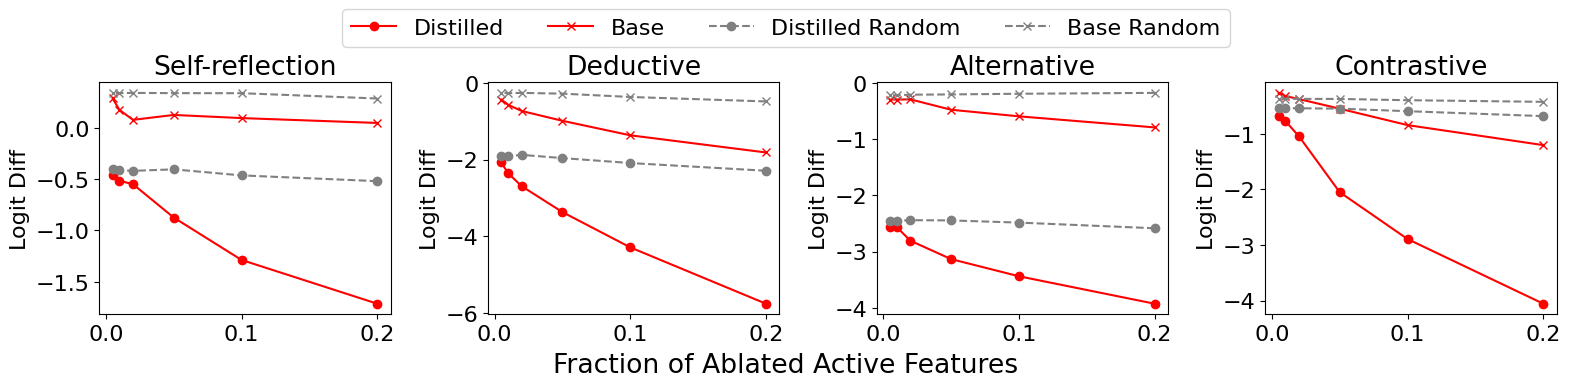

In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
threshold_list = [0.2,0.1,0.05, 0.02, 0.01, 0.005]

target_name_to_title = {
    "wait": "Self-reflection",
    "deductive": "Deductive",
    "alternative": "Alternative",
    "contrastive": "Contrastive"
}
save_name = "qwen-7b"
for i, target_name in enumerate(target_name_list):
    ax = axs[i]
    # Reinitialize lists for each subplot to avoid mixing data between targets.
    x_list = []
    diff_chat_list = []
    diff_base_list = []
    diff_chat_random_list = []
    diff_base_random_list = []
    
    for thres in threshold_list:
        for tmp_str in ["half", "full"]:
            filename = f"../results/{save_name}_{target_name}_{tmp_str}_no_{str(thres)}_logits.json"
            with open(filename, "r") as f:
                data = json.loads(f.read())
            num_ablate_feature = len(data["ablate_features"])
            diff_chat_logit = np.mean(np.array(data["new_chat_logit"]) - np.array(data["orig_chat_logit"]))
            diff_base_logit = np.mean(np.array(data["new_base_logit"]) - np.array(data["orig_base_logit"]))
            
            if tmp_str == "full":
                diff_chat_random_list.append(diff_chat_logit)
                diff_base_random_list.append(diff_base_logit)
                x_list.append(thres)
            else:
                diff_chat_list.append(diff_chat_logit)
                diff_base_list.append(diff_base_logit)
    
    
    ax.ticklabel_format(axis='x', style='plain')
    ax.plot(x_list, diff_chat_list, 'r-o', label="Distilled")
    ax.plot(x_list, diff_base_list, 'r-x', label="Base")
    ax.plot(x_list, diff_chat_random_list, '--o',color='gray', label="Distilled Random")
    ax.plot(x_list, diff_base_random_list, '--x',color='gray', label="Base Random")
    ax.set_ylabel("Logit Diff")
    # Set ticks to be exactly the threshold values from x_list.
#    ax.set_xscale('log')

#    ax.set_xticks([0.02, 0.05, 0.1])
#    ax.xaxis.set_major_locator(ticker.LogLocator(base=10))
#    ax.xaxis.set_major_formatter(ticker.LogFormatter())
    ax.set_title(target_name_to_title[target_name])

fig.supxlabel("Fraction of Ablated Active Features", x=0.5, y=0.1)

# Create a global legend. We use the handles and labels from the first subplot.
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
fig.tight_layout(rect=[0, 0, 1, 0.97])

plt.savefig("../figures/ablation_logit.pdf", bbox_inches='tight')
plt.show()
